/var/folders/xg/2llgf1bs5zl5y67jw65l687h0000gn/T/ipykernel_33579/3011689269.py:14: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


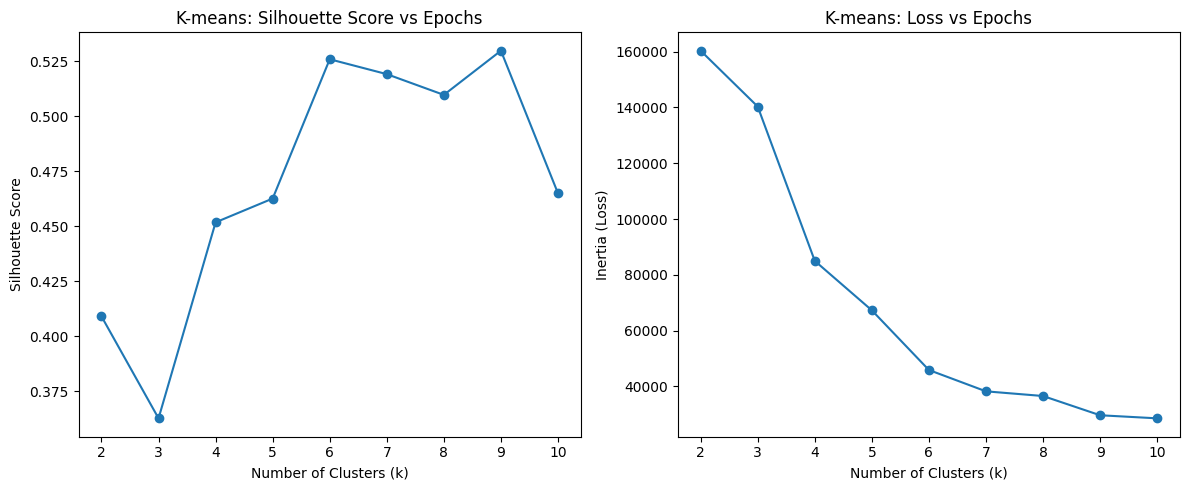

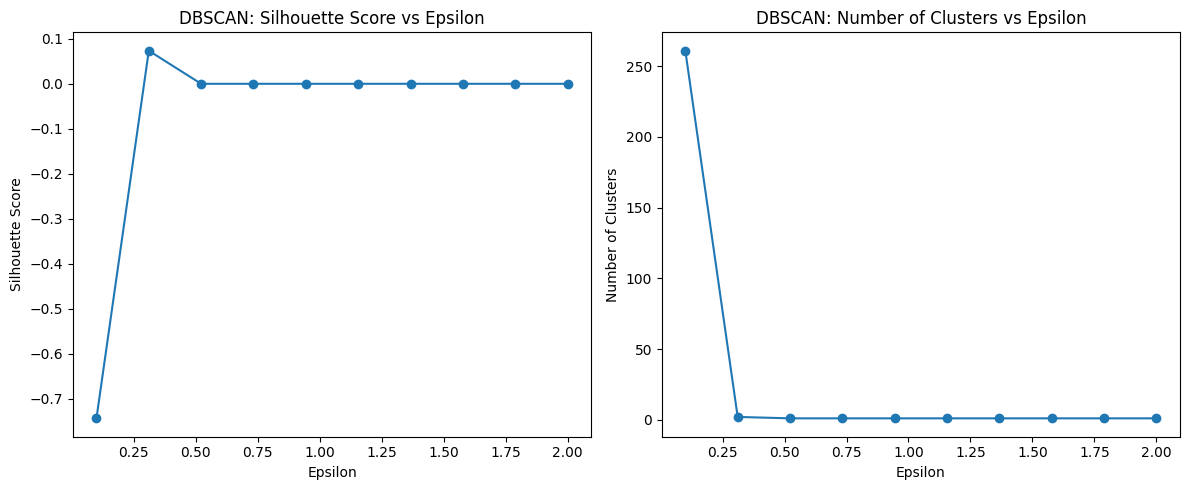

/Users/krishmakhijani/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/krishmakhijani/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/krishmakhijani/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/krishmakhijani/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/krishmakhijani/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/ut

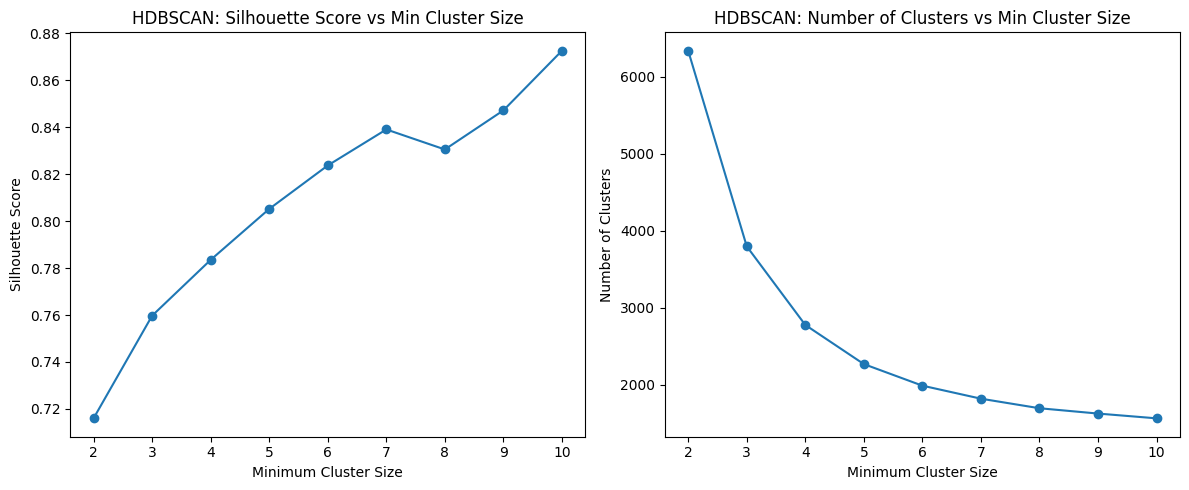


Best Scores for Each Algorithm:
K-means best score: 0.5297
DBSCAN best score: 0.0735
HDBSCAN best score: 0.8727


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('./Plant_1_Generation_Data.csv')

# Convert DATE_TIME to datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Select features for clustering
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store metrics
epochs = range(2, 11)
kmeans_scores = []
kmeans_losses = []

# K-means analysis over epochs
plt.figure(figsize=(12, 5))
for k in epochs:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    kmeans_losses.append(kmeans.inertia_)

# Plot K-means metrics
plt.subplot(1, 2, 1)
plt.plot(epochs, kmeans_scores, marker='o')
plt.title('K-means: Silhouette Score vs Epochs')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(epochs, kmeans_losses, marker='o')
plt.title('K-means: Loss vs Epochs')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Loss)')

plt.tight_layout()
plt.show()

# DBSCAN analysis with different eps values
eps_values = np.linspace(0.1, 2, 10)
dbscan_scores = []
dbscan_n_clusters = []

plt.figure(figsize=(12, 5))
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        # Only calculate silhouette score if there are 2 or more clusters
        score = silhouette_score(X_scaled, labels)
    else:
        score = 0

    dbscan_scores.append(score)
    dbscan_n_clusters.append(n_clusters)

plt.subplot(1, 2, 1)
plt.plot(eps_values, dbscan_scores, marker='o')
plt.title('DBSCAN: Silhouette Score vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(eps_values, dbscan_n_clusters, marker='o')
plt.title('DBSCAN: Number of Clusters vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')

plt.tight_layout()
plt.show()

# HDBSCAN analysis with different min_cluster_sizes
min_cluster_sizes = range(2, 11)
hdbscan_scores = []
hdbscan_n_clusters = []

plt.figure(figsize=(12, 5))
for min_size in min_cluster_sizes:
    hdbscan = HDBSCAN(min_cluster_size=min_size)
    labels = hdbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        # Filter out noise points (labeled as -1) for silhouette score
        mask = labels != -1
        if np.sum(mask) > 1:  # Ensure we have enough points after filtering
            score = silhouette_score(X_scaled[mask], labels[mask])
        else:
            score = 0
    else:
        score = 0

    hdbscan_scores.append(score)
    hdbscan_n_clusters.append(n_clusters)

plt.subplot(1, 2, 1)
plt.plot(min_cluster_sizes, hdbscan_scores, marker='o')
plt.title('HDBSCAN: Silhouette Score vs Min Cluster Size')
plt.xlabel('Minimum Cluster Size')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(min_cluster_sizes, hdbscan_n_clusters, marker='o')
plt.title('HDBSCAN: Number of Clusters vs Min Cluster Size')
plt.xlabel('Minimum Cluster Size')
plt.ylabel('Number of Clusters')

plt.tight_layout()
plt.show()

# Print best scores for each algorithm
print("\nBest Scores for Each Algorithm:")
print(f"K-means best score: {max(kmeans_scores):.4f}")
print(f"DBSCAN best score: {max(dbscan_scores):.4f}")
print(f"HDBSCAN best score: {max(hdbscan_scores):.4f}")
